In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:
df = pd.read_csv(r'C:\Users\SM ZONA GAMER\Documents\UNAD\Cuarto Semestre\Otros\Analisis de datos\Tarea 5\Dataset Titanic\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Descripción del DataFrame:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642  

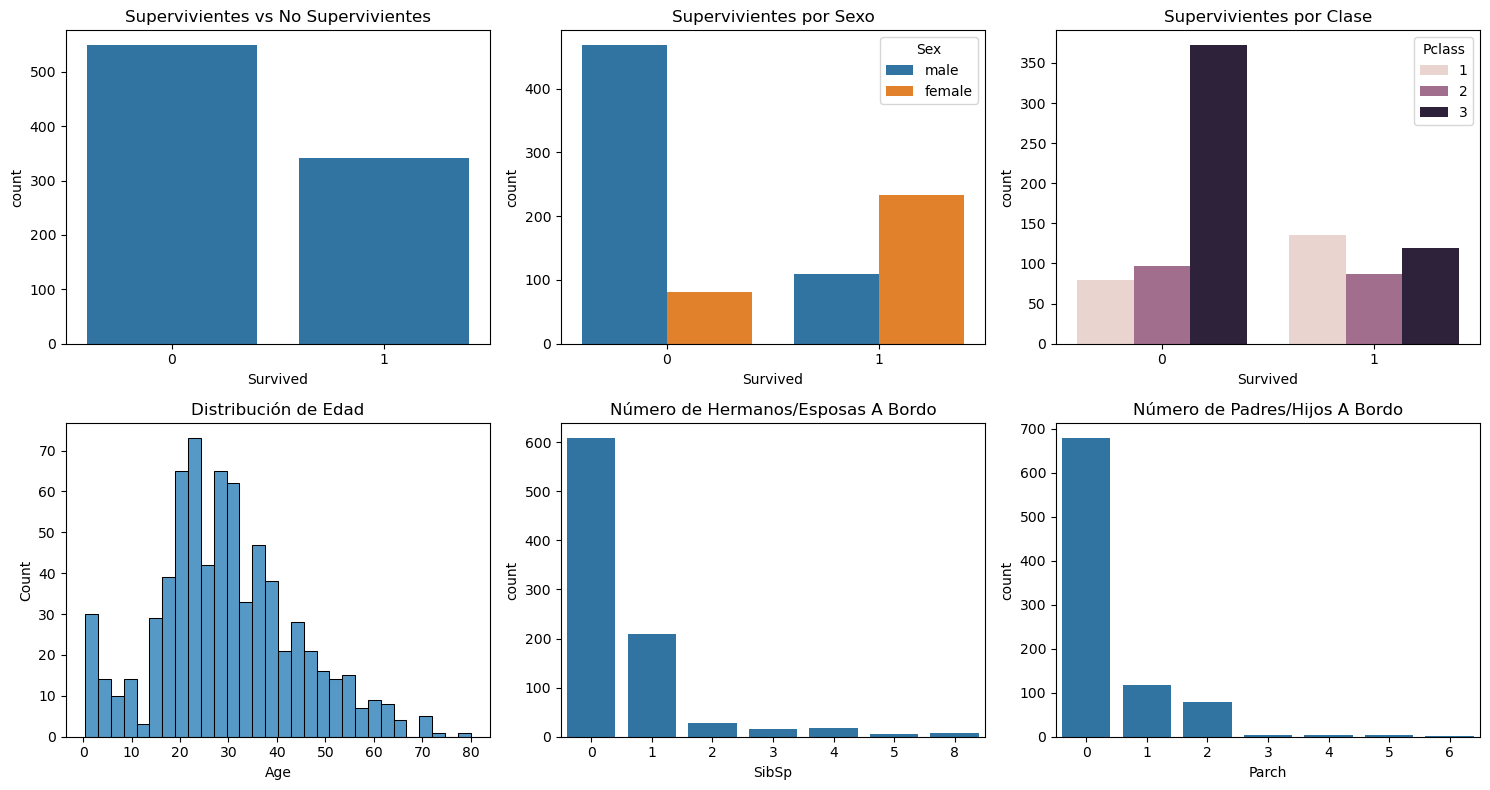


Valores nulos en el DataFrame:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores nulos después del preprocesamiento:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Matriz de Confusión:
[[136  21]
 [ 30  81]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 0.8097014925373134


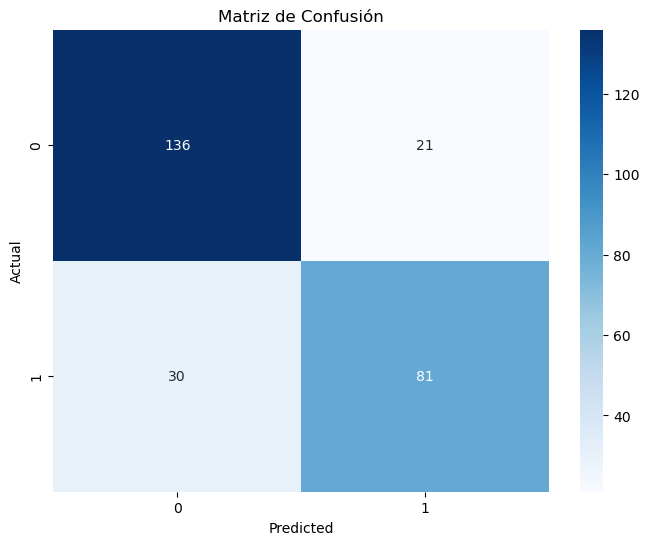

In [6]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar el dataset
ruta = r'C:\Users\SM ZONA GAMER\Documents\UNAD\Cuarto Semestre\Otros\Analisis de datos\Tarea 5\Dataset Titanic\Titanic-Dataset.csv'
df = pd.read_csv(ruta)

# Análisis exploratorio de datos (EDA)
print("Información del DataFrame:")
print(df.info())
print("\nDescripción del DataFrame:")
print(df.describe())

# Visualización de algunas relaciones y distribuciones
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=df)
plt.title('Supervivientes vs No Supervivientes')

plt.subplot(2, 3, 2)
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Supervivientes por Sexo')

plt.subplot(2, 3, 3)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Supervivientes por Clase')

plt.subplot(2, 3, 4)
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.title('Distribución de Edad')

plt.subplot(2, 3, 5)
sns.countplot(x='SibSp', data=df)
plt.title('Número de Hermanos/Esposas A Bordo')

plt.subplot(2, 3, 6)
sns.countplot(x='Parch', data=df)
plt.title('Número de Padres/Hijos A Bordo')

plt.tight_layout()
plt.show()

# Preprocesamiento de datos
# Tratamiento de valores faltantes
print("\nValores nulos en el DataFrame:")
print(df.isnull().sum())

# Llenar los valores nulos en 'Age' con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

# Llenar los valores nulos en 'Embarked' con el modo
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


# Dropear la columna 'Cabin' debido a demasiados valores faltantes
df.drop('Cabin', axis=1, inplace=True)

# Verificar nuevamente los valores nulos
print("\nValores nulos después del preprocesamiento:")
print(df.isnull().sum())

# Transformación de datos
# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Seleccionar las características más relevantes
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Visualización de resultados
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


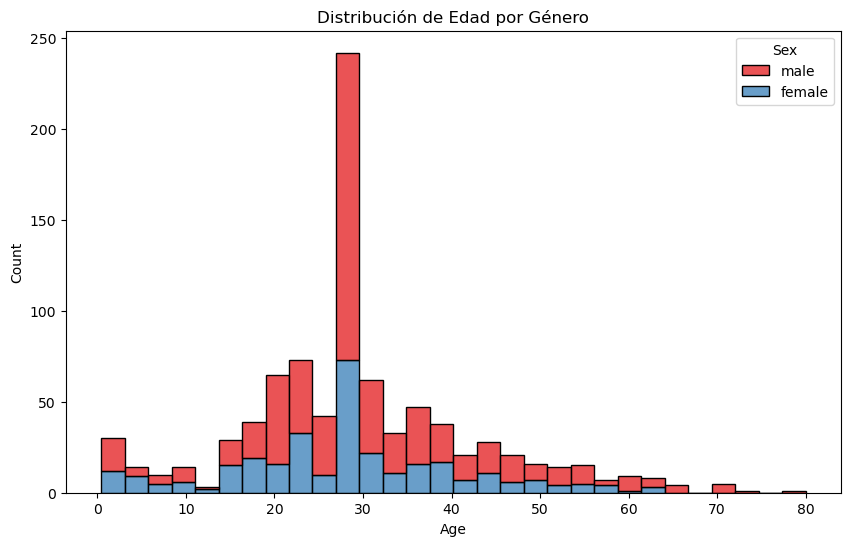

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que tienes los datos cargados
df = pd.read_csv(r'C:\Users\SM ZONA GAMER\Documents\UNAD\Cuarto Semestre\Otros\Analisis de datos\Tarea 5\Dataset Titanic\Titanic-Dataset.csv')

# Llenar valores faltantes en 'Age' y 'Embarked' como se ha mostrado previamente
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Crear el gráfico apilado con 'Age' y categorizado por 'Sex' y 'Pclass'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Sex", multiple="stack", bins=30, palette="Set1")

# Configurar etiquetas y título
plt.title('Distribución de Edad por Género')
plt.xlabel('Age')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()
